## Data Analysis using Python_2

Load Titanic dataset which is available in seaborn and answer the questions.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic = sns.load_dataset('titanic')
titanic.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
titanic.shape

(891, 15)

In [3]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

There are NaNs in age, embarked, deck and embark_town. Do remember to handle them when using those columns.

In [5]:
#HANDLING MISSING VALUES.
titanic=titanic.fillna(titanic.mean())
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode().iloc[0])
titanic['deck'] = titanic['deck'].fillna(titanic['deck'].mode().iloc[0])
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode().iloc[0])

In [6]:
titanic.isnull().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
deck           False
embark_town    False
alive          False
alone          False
dtype: bool

#### 1. Plot the age distribution of passangers using distplot(). Use dropna to drop rows with NaN values in column age.

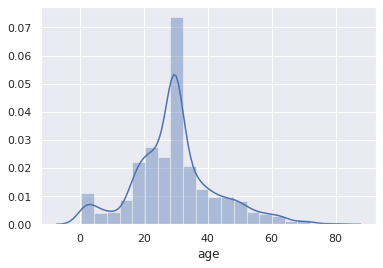

In [7]:
sns.set(color_codes=True)
ax=sns.distplot(titanic.age, bins=20,hist=True)

#### 2. Create an lmplot of age and fare. Use plt.ylim(0, 300) to exclude outliers

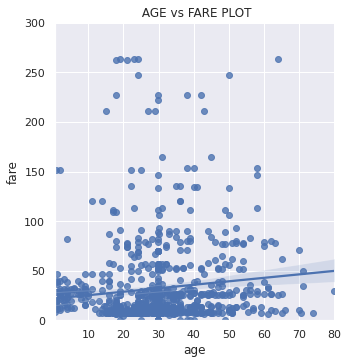

In [8]:
sns.lmplot(x='age',y='fare',data = titanic)
plt.ylim(0,300)
plt.title(" AGE vs FARE PLOT") 
plt.show() 

#### 3. Add two more parameters, pclass and survived to the plot created in Qn 2. 

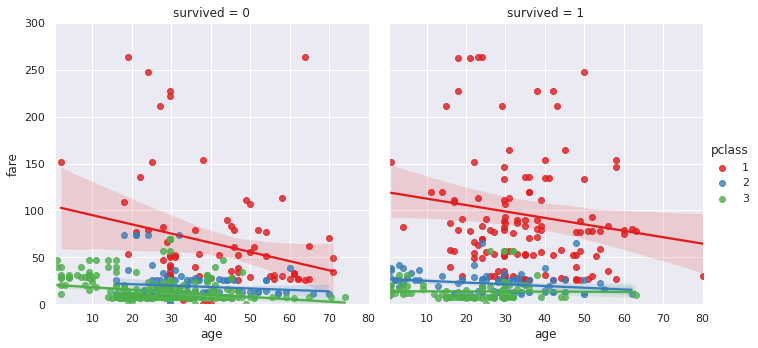

In [9]:
sns.lmplot(x='age',y='fare',data = titanic, hue='pclass',palette="Set1",col='survived')
plt.ylim(0,300)
plt.show() 

#### 4. Visualize the distribution of three classes using countplot. How many first, second and third class passengers were on board. Use sex column as additional parameter using hue.

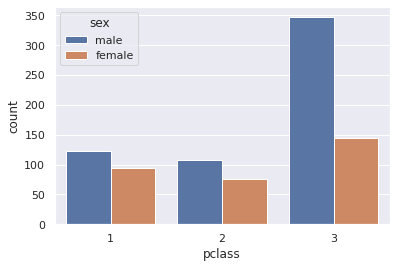

In [10]:
sns.countplot('pclass',data=titanic,hue='sex')

#### 5. Create distplot of age, break-down the plot on categories survived and class using facetgrid.

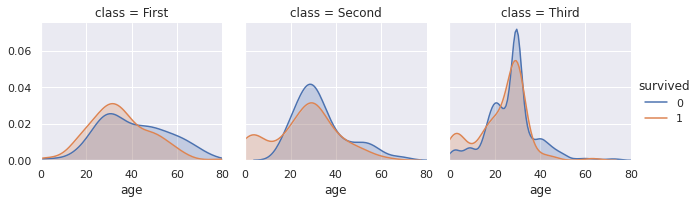

In [18]:
fig = sns.FacetGrid(titanic,hue='survived',col='class')
fig.map(sns.kdeplot,'age',shade=True)
oldest = titanic['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()